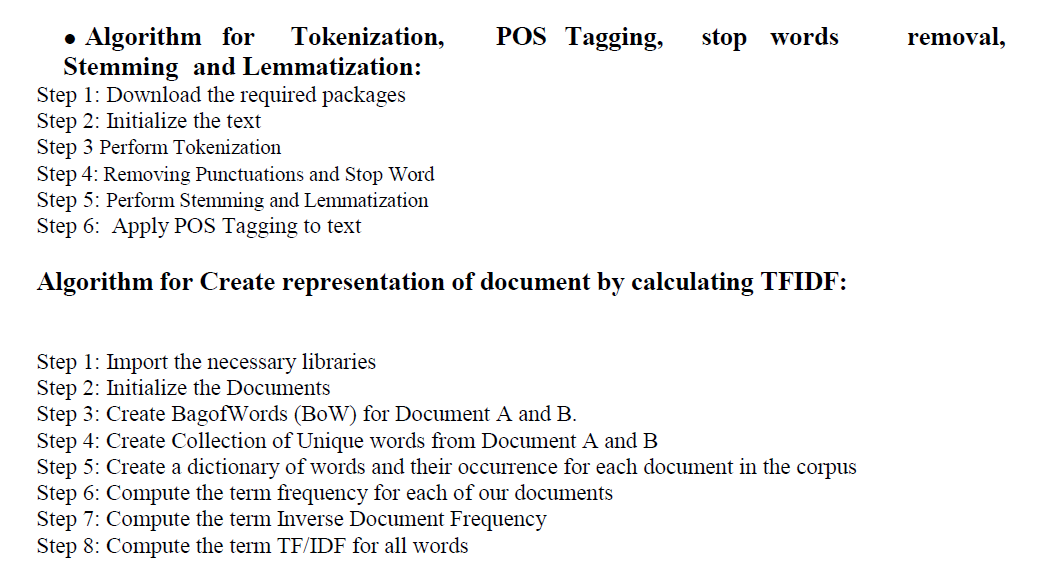

In [4]:
# Importing necessary libraries
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag
from nltk.tokenize import sent_tokenize
# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
# Sample document for processing
document = """
Natural language processing (NLP) is a field of artificial intelligence that enables computers to understand,
interpret, and respond to human language. NLP tasks include text classification, sentiment analysis, machine translation,
and more. It involves the application of linguistic and statistical techniques to extract useful information from textual data.
"""
# 1. Tokenization
tokens = word_tokenize(document)
print("Tokens:", tokens)

Tokens: ['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'enables', 'computers', 'to', 'understand', ',', 'interpret', ',', 'and', 'respond', 'to', 'human', 'language', '.', 'NLP', 'tasks', 'include', 'text', 'classification', ',', 'sentiment', 'analysis', ',', 'machine', 'translation', ',', 'and', 'more', '.', 'It', 'involves', 'the', 'application', 'of', 'linguistic', 'and', 'statistical', 'techniques', 'to', 'extract', 'useful', 'information', 'from', 'textual', 'data', '.']


[nltk_data] Downloading package punkt to C:\Users\Gayatri
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Gayatri
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Gayatri
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Gayatri Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
# 2. Part-of-Speech (POS) Tagging
pos_tags = pos_tag(tokens)
print("\nPOS Tags:", pos_tags)
# 3. Stop Words Removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print("\nTokens after stop word removal:", filtered_tokens)
# 4. Stemming (Using PorterStemmer)
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
print("\nStemmed Tokens:", stemmed_tokens)
# 5. Lemmatization (Using WordNetLemmatizer)
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print("\nLemmatized Tokens:", lemmatized_tokens)
# 6. TF-IDF Representation of Documents
# Example corpus of documents
corpus = [
"Natural language processing enables computers to understand human language.",
"Text classification is one of the important tasks in NLP.",
"NLP helps in sentiment analysis, language translation, and more."
]
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()


POS Tags: [('Natural', 'JJ'), ('language', 'NN'), ('processing', 'NN'), ('(', '('), ('NLP', 'NNP'), (')', ')'), ('is', 'VBZ'), ('a', 'DT'), ('field', 'NN'), ('of', 'IN'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('that', 'WDT'), ('enables', 'VBZ'), ('computers', 'NNS'), ('to', 'TO'), ('understand', 'VB'), (',', ','), ('interpret', 'VB'), (',', ','), ('and', 'CC'), ('respond', 'NN'), ('to', 'TO'), ('human', 'JJ'), ('language', 'NN'), ('.', '.'), ('NLP', 'NNP'), ('tasks', 'NNS'), ('include', 'VBP'), ('text', 'JJ'), ('classification', 'NN'), (',', ','), ('sentiment', 'NN'), ('analysis', 'NN'), (',', ','), ('machine', 'NN'), ('translation', 'NN'), (',', ','), ('and', 'CC'), ('more', 'JJR'), ('.', '.'), ('It', 'PRP'), ('involves', 'VBZ'), ('the', 'DT'), ('application', 'NN'), ('of', 'IN'), ('linguistic', 'JJ'), ('and', 'CC'), ('statistical', 'JJ'), ('techniques', 'NNS'), ('to', 'TO'), ('extract', 'VB'), ('useful', 'JJ'), ('information', 'NN'), ('from', 'IN'), ('textual', 'JJ'), ('data

In [6]:
# Fit and transform the corpus to get the TF-IDF representation
tfidf_matrix = vectorizer.fit_transform(corpus)
# Convert the matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("\nTF-IDF Representation of Corpus:")
print(tfidf_df)


TF-IDF Representation of Corpus:
   analysis       and  classification  computers   enables     helps  \
0  0.000000  0.000000        0.000000   0.327673  0.327673  0.000000   
1  0.000000  0.000000        0.330467   0.000000  0.000000  0.000000   
2  0.359554  0.359554        0.000000   0.000000  0.000000  0.359554   

      human  important        in        is  ...        of       one  \
0  0.327673   0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1  0.000000   0.330467  0.251329  0.330467  ...  0.330467  0.330467   
2  0.000000   0.000000  0.273450  0.000000  ...  0.000000  0.000000   

   processing  sentiment     tasks      text       the        to  translation  \
0    0.327673   0.000000  0.000000  0.000000  0.000000  0.327673     0.000000   
1    0.000000   0.000000  0.330467  0.330467  0.330467  0.000000     0.000000   
2    0.000000   0.359554  0.000000  0.000000  0.000000  0.000000     0.359554   

   understand  
0    0.327673  
1    0.000000  
2    0.000000  

[3

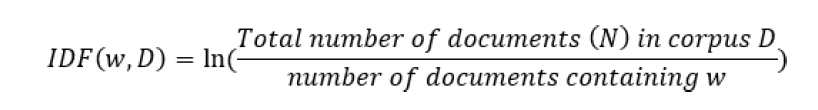
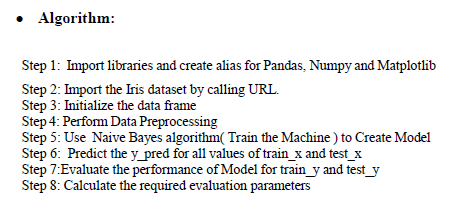
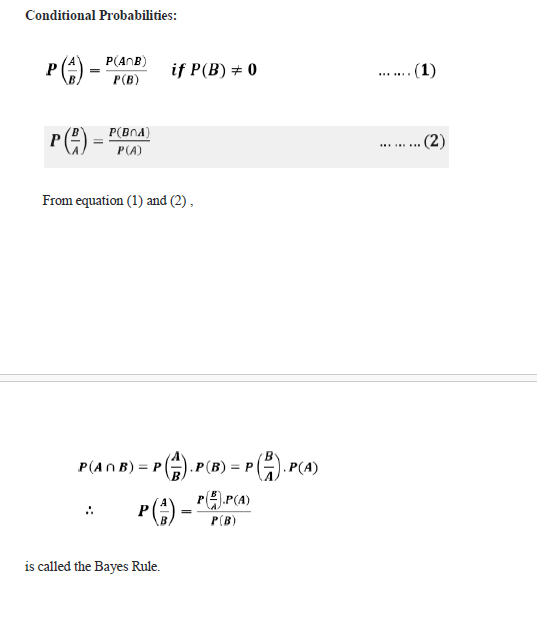
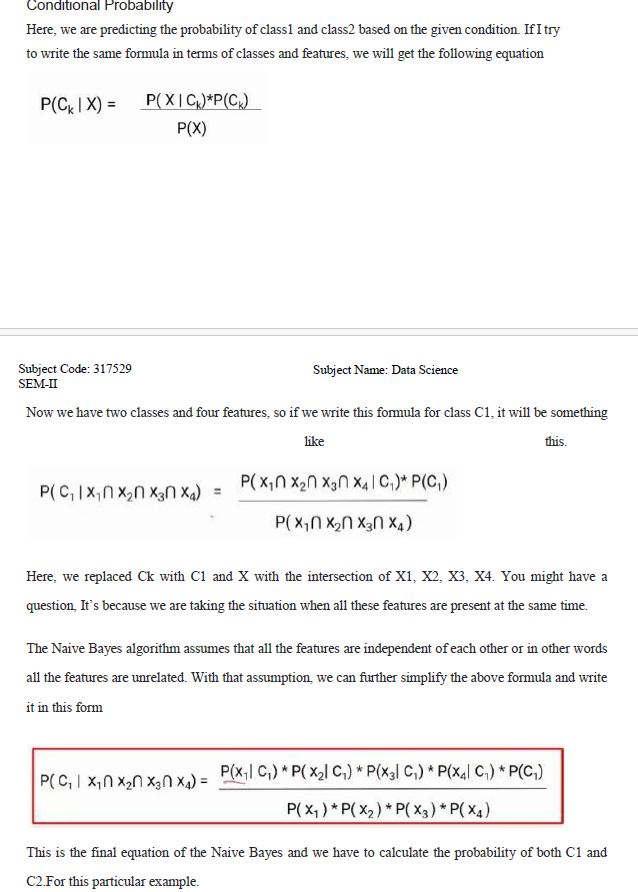